<a href="https://colab.research.google.com/github/jiyun1006/colab_deep/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

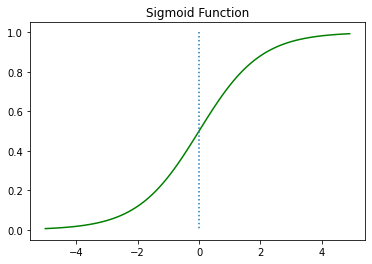

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

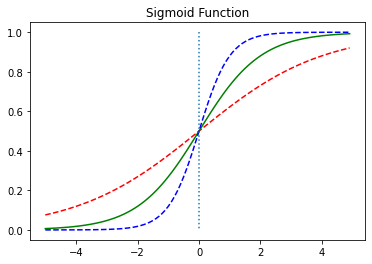

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1) 

In [ ]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)


torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [ ]:
hypothesis = 1 / (1+torch.exp(x_train.matmul(W)+b))

In [ ]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


In [ ]:
# 오차
losses = -(y_train*torch.log(hypothesis) + (1-y_train)*torch.log((1-hypothesis)))
print(losses)

# 오차에 대한 평균

cost = losses.mean()
print(cost)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)
tensor(0.6931, grad_fn=<MeanBackward0>)


In [ ]:
# 로지스틱 회귀 비용함수 api 

F.binary_cross_entropy(hypothesis, y_train)


nb_epochs = 1000

optimizer = optim.SGD([W,b], lr = 1)

for epoch in range(nb_epochs+1):
  hypothesis = torch.sigmoid(x_train.matmul(W)+b)

  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))



Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
# 학습된 W,b를 가지고 예측값 출력
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)
correct_prediction = prediction.float() == y_train


tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
6


nn.Module


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch

torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [ ]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
  hypothesis = model(x_train)

  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


클래스로 로지스틱 회귀 모델 구현


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()


  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [ ]:
model = BinaryClassifier()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000


for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

tensor(0.5397, grad_fn=<BinaryCrossEntropyBackward>)
Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
tensor(0.5270, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6202, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1885, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.8042, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6321, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4456, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4711, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5224, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.7650, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6149, grad_fn=<BinaryCrossEntropyBackward>)
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
tensor(0.9946, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4937, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6485, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5072, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6950, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4778, grad_fn=<BinaryCrossEntropyBackward>)
tenso